# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 562


In [3]:
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
lat_lngs_data = list(lat_lngs)
print(lat_lngs_data)

[(-52.35760473981076, -109.67232458527216), (28.07497971362423, -164.55995667195558), (-12.306233481891809, -147.54506003311448), (87.34707109982187, -44.79202127997266), (-66.12082337722302, 179.1328499313238), (73.61458923800976, 2.382019200809083), (12.423064452080169, 136.6840271027907), (1.3815561732488675, 36.25045852514833), (-26.541735713374138, -35.089526989450206), (-40.15499327413091, -87.64290008880047), (11.169495317303884, 122.79314618199743), (-83.64850929388949, 96.97356663255772), (-74.54651287606703, 162.20605431754848), (-8.68283987660611, 133.84456583875084), (-23.458051934226603, -27.501638763556883), (-41.339408729557036, 123.81610999890427), (34.254395910387544, -46.12667358987389), (-14.534549261353547, 22.97342732498234), (-86.7070698169933, -112.86539920870081), (22.804573925977394, -133.18324290144153), (-65.06096119796544, 122.97637667718146), (9.667272077234543, 162.78147031812125), (-88.24384750949386, 80.42812874878138), (-60.86893481042755, -42.176915300

In [5]:
dict = {"latitude": lats,
        "longitude": lngs}
        
lat_lngs_df = pd.DataFrame(dict)
lat_lngs_df.head()

,latitude,longitude
0,-52.357605,-109.672325
1,28.074980,-164.559957
2,-12.306233,-147.545060
3,87.347071,-44.792021
4,-66.120823,179.132850


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | mahina
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | maralal
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | barotac viejo
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | tual
Processing Record 15 of Set 1 | nova vicosa
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mount pearl
Processing Record 18 of Set 1 | kalabo
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | enewetak
Processing Record 22 of Set 1 | grytviken
Processin

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.73,86,100,18.80,PN,1711975150
1,wailua homesteads,22.0669,-159.3780,22.44,80,75,6.17,US,1711975150
2,mahina,-17.5065,-149.4890,26.87,83,75,2.57,PF,1711974778
3,ilulissat,69.2167,-51.1000,-2.99,74,75,0.00,GL,1711975150
4,papatowai,-46.5619,169.4708,9.43,89,100,2.53,NZ,1711975150


In [10]:
# Show Record Count
city_data_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.73,86,100,18.80,PN,1711975150
1,wailua homesteads,22.0669,-159.3780,22.44,80,75,6.17,US,1711975150
2,mahina,-17.5065,-149.4890,26.87,83,75,2.57,PF,1711974778
3,ilulissat,69.2167,-51.1000,-2.99,74,75,0.00,GL,1711975150
4,papatowai,-46.5619,169.4708,9.43,89,100,2.53,NZ,1711975150


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

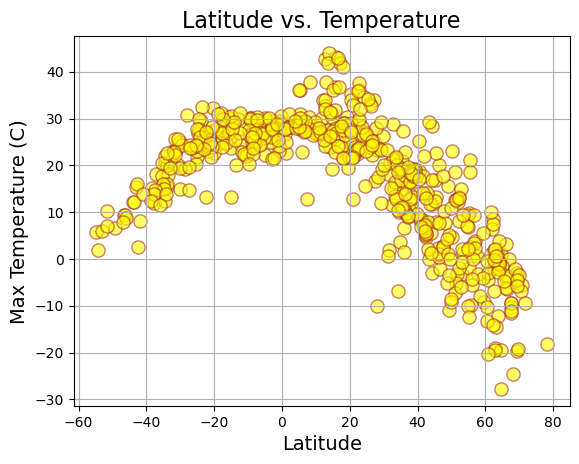

In [23]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, 90, marker='o', facecolors='yellow', edgecolors='brown', alpha=.6) 
plt.grid(True)
plt.tight_layout

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.title('Latitude vs. Temperature', fontsize=16)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

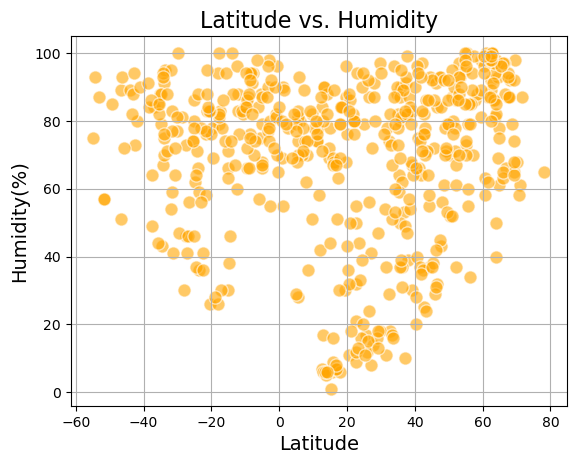

In [21]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, 90, marker='o', facecolors='orange', edgecolors='white', alpha=.6) 
plt.grid(True)
plt.tight_layout

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity(%)', fontsize=14)
plt.title('Latitude vs. Humidity', fontsize=16)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

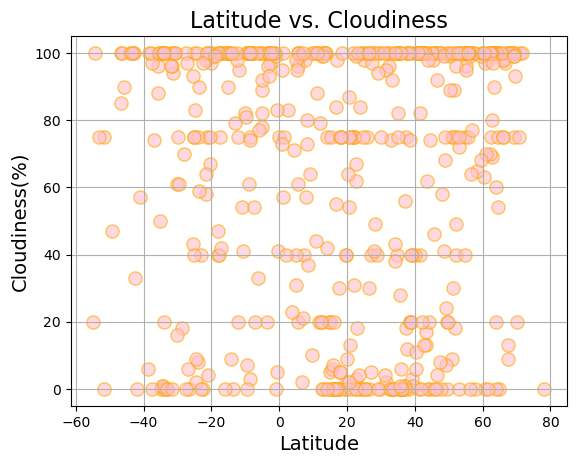

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, 90, marker='o', facecolors='pink', edgecolors='orange', alpha=.6) 
plt.grid(True)
plt.tight_layout

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness(%)', fontsize=14)
plt.title('Latitude vs. Cloudiness', fontsize=16)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

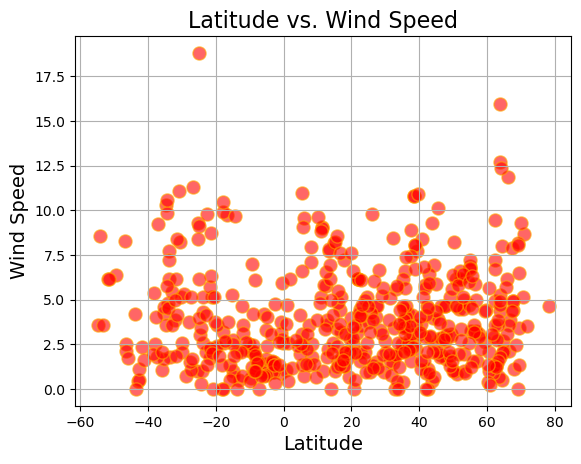

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, 90, marker='o', facecolors='red', edgecolors='orange', alpha=.6) 
plt.grid(True)
plt.tight_layout

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.title('Latitude vs. Wind Speed', fontsize=16)

# Save the figure
plt.savefig("output_data/Fig4.png", dpi=350)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,22.44,80,75,6.17,US,1711975150
3,ilulissat,69.2167,-51.1000,-2.99,74,75,0.00,GL,1711975150
5,olonkinbyen,70.9221,-8.7187,-5.63,61,100,8.66,SJ,1711975150
6,colonia,50.9333,6.9500,12.69,87,75,6.17,DE,1711975150
7,maralal,1.0968,36.6980,22.73,55,57,4.70,KE,1711975150


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.73,86,100,18.80,PN,1711975150
2,mahina,-17.5065,-149.4890,26.87,83,75,2.57,PF,1711974778
4,papatowai,-46.5619,169.4708,9.43,89,100,2.53,NZ,1711975150
8,sao joao da barra,-21.6403,-41.0511,27.05,76,58,1.72,BR,1711975150
9,ancud,-41.8697,-73.8203,8.20,80,0,2.33,CL,1711975151


In [44]:
# Define a function to create Linear Regression plots
def linearregression(x_values, y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, 90, marker='o', facecolors='blue', alpha=0.6)
    plt.plot(x_values, regress_values, 'r-', linewidth=4)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX, regEQplotY), fontsize=18, color='red')
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(f'{ylabel}', fontsize=14)
    plt.grid()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8525862480109982


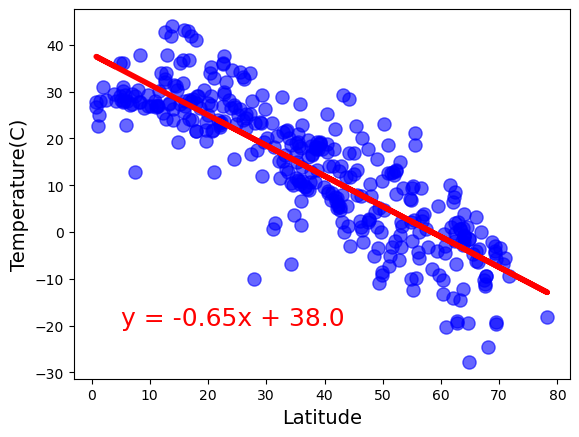

In [45]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df['Lat']
y_plot = northern_hemi_df['Max Temp']
linearregression(x_plot, y_plot, 5, -20, 'Temperature(C)')
plt.savefig('output_data/Fig5.png',dpi=300)

The r-value is 0.7741424869935547


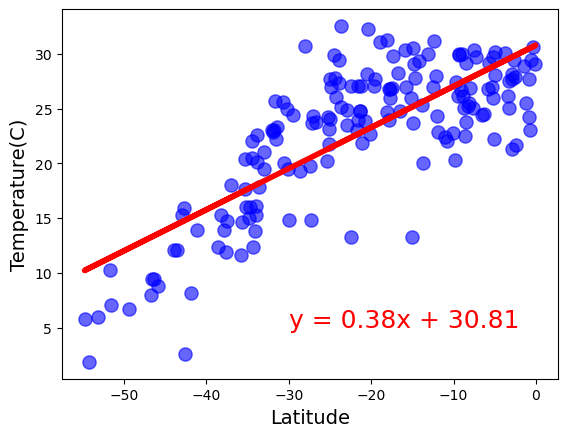

In [57]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df['Lat']
y_plot = southern_hemi_df['Max Temp']
linearregression(x_plot, y_plot, -30, 5, 'Temperature(C)')
plt.savefig('output_data/Fig5.png',dpi=300)

**Discussion about the linear relationship: The northern hemisphere shows that the the higher the latitude the lower the temperatures. The southern hemisphere shows the higher the latitude the higher the temperature. The two hemispheres show an opposite coorelation.** 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.31438851565217085


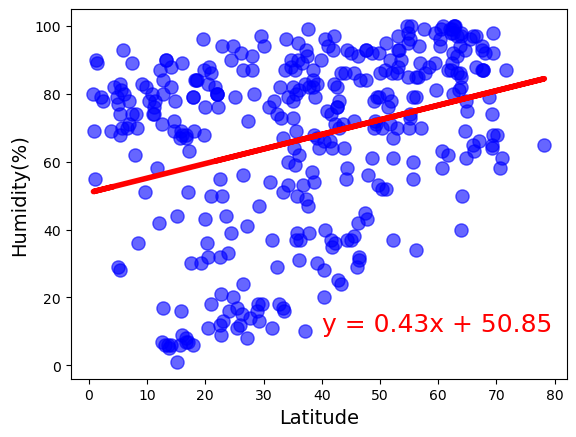

In [74]:
# Northern Hemisphere
x_plot = northern_hemi_df['Lat']
y_plot = northern_hemi_df['Humidity']
linearregression(x_plot, y_plot, 40, 10, 'Humidity(%)')
plt.savefig('output_data/Fig5.png',dpi=300)

The r-value is 0.07616658986349892


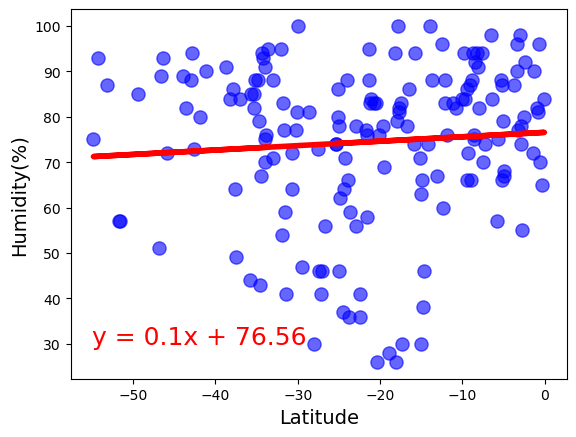

In [88]:
# Southern Hemisphere
x_plot = southern_hemi_df['Lat']
y_plot = southern_hemi_df['Humidity']
linearregression(x_plot, y_plot, -55, 30, 'Humidity(%)')
plt.savefig('output_data/Fig5.png',dpi=300)

**Discussion about the linear relationship: The northern hemisphere shows that the higher the latitude the area shows a dense cluster of humidity. The southern hemisphere shows the higher the latitude the area shows a more dense cluster of humidity. The trend for both hemispheres are the same.**

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.21922625086741987


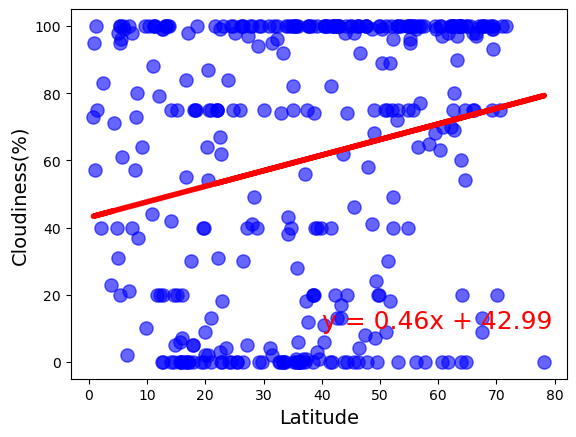

In [89]:
# Northern Hemisphere
x_plot = northern_hemi_df['Lat']
y_plot = northern_hemi_df['Cloudiness']
linearregression(x_plot, y_plot, 40, 10, 'Cloudiness(%)')
plt.savefig('output_data/Fig5.png',dpi=300)

The r-value is 0.125095139288779


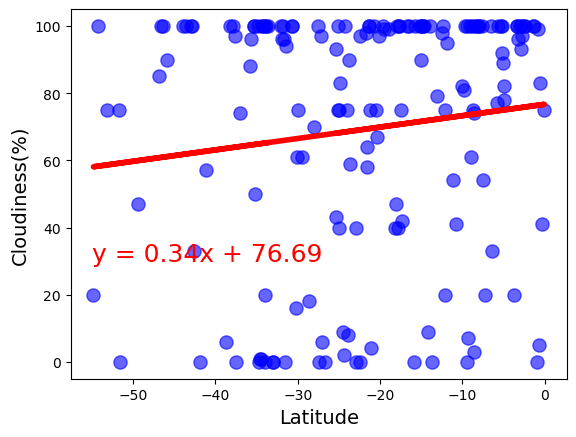

In [90]:
# Southern Hemisphere
x_plot = southern_hemi_df['Lat']
y_plot = southern_hemi_df['Cloudiness']
linearregression(x_plot, y_plot, -55, 30, 'Cloudiness(%)')
plt.savefig('output_data/Fig5.png',dpi=300)

**Discussion about the linear relationship:The linear relationship of cloudiness vs. latitude is flat and evenly distributed between both the northern hemisphere and the southern hemisphere.**

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.058870125675928676


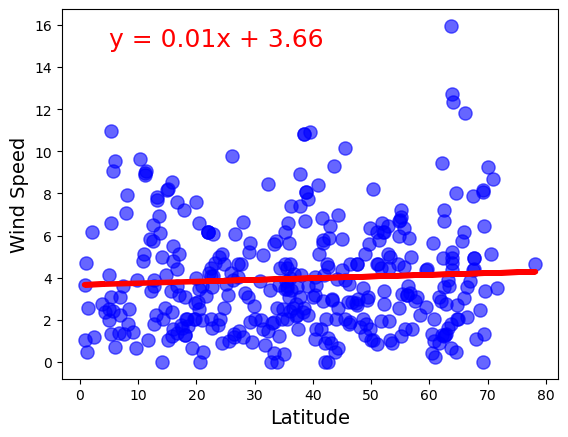

In [99]:
# Northern Hemisphere
x_plot = northern_hemi_df['Lat']
y_plot = northern_hemi_df['Wind Speed']
linearregression(x_plot, y_plot, 5, 15, 'Wind Speed')
plt.savefig('output_data/Fig5.png',dpi=300)

The r-value is -0.29331311025915874


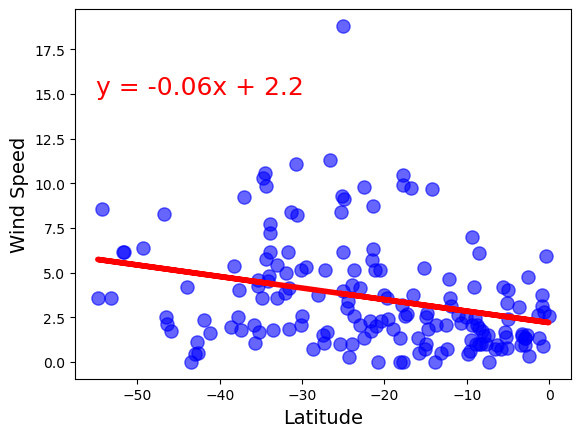

In [107]:
# Southern Hemisphere
x_plot = southern_hemi_df['Lat']
y_plot = southern_hemi_df['Wind Speed']
linearregression(x_plot, y_plot, -55, 15, 'Wind Speed')
plt.savefig('output_data/Fig5.png',dpi=300)

**Discussion about the linear relationship: Wind Speed is overall low in both the Southern Hemisphere and the Northern Hemisphere.**